Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
print("Libraries imported, go ahead!")

Libraries imported, go ahead!


Loading Datasets

In [18]:
datasets = {
    1: 'D:\itz\Github\Stock_Perdictioin\AAPL.csv',
    2: 'D:\itz\Github\Stock_Perdictioin\TSLA.csv',
    3: 'D:\itz\Github\Stock_Perdictioin\SBIN.NS(2).csv',
    4: 'D:\itz\Github\Stock_Perdictioin\RELIANCE.NS.csv',
    5: 'D:\itz\Github\Stock_Perdictioin\GUJGASLTD.NS.csv',
    6: 'D:\itz\Github\Stock_Perdictioin\ADANIGREEN.NS.csv'
}
print("Dataset loaded")

Dataset loaded


Fuction to load the selected dataset

In [19]:
def load_dataset(choice):
    if choice in datasets:
        return pd.read_csv(datasets[choice])
    else:
        raise ValuseError("Invalide choice! Please select a number bewteen 1-6") 

In [30]:
print("1. AAPL\n2. TSLA\n3. SBIN\n4. RELIANCE\n5. GUJGASLTD\n6. ADANIGREEN")
print("Select the stock to predict the price: ")
choice = int(input())
selected_df = load_dataset(choice)

1. AAPL
2. TSLA
3. SBIN
4. RELIANCE
5. GUJGASLTD
6. ADANIGREEN
Select the stock to predict the price: 


 1


Preparing the dataset

In [22]:
X = selected_df[['Open', 'High', 'Low', 'Volume', 'Adj Close']]
y = selected_df['Close']

Splitting the dataset into training and testing sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Training the model

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Making prediction

In [25]:
y_pred = model.predict(X_test)

Numerical results

In [26]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("\nPredicted vs Actual Closing Prices:")
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

Mean Squared Error: 0.11516689966805191

Predicted vs Actual Closing Prices:
          Actual   Predicted
2196  145.850006  145.613642
410    25.132500   24.854035
1389   47.587502   47.590609
888    24.217501   24.497867
1772   78.809998   78.728410


Visual results

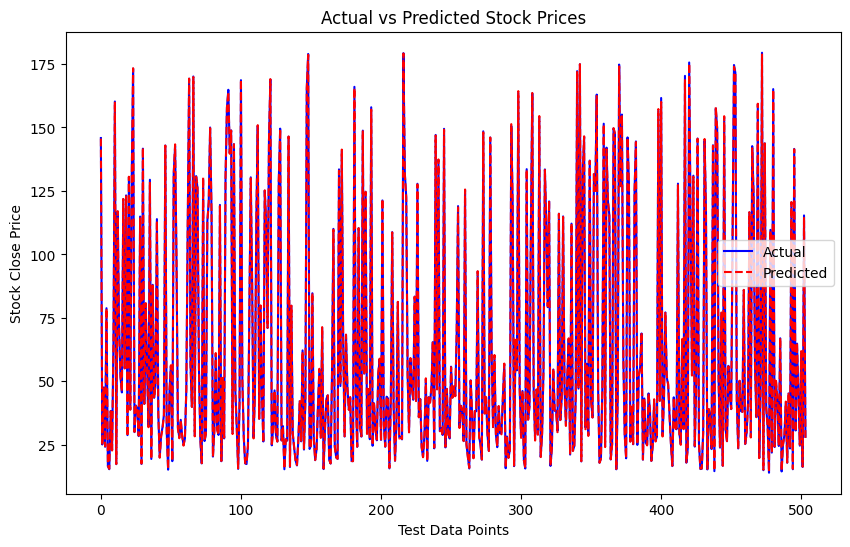

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Test Data Points')
plt.ylabel('Stock Close Price')
plt.legend()
plt.show()

If you want to add the predicted value to the dataset

In [28]:
selected_df['Predicted_Close'] = np.nan  
selected_df.loc[y_test.index, 'Predicted_Close'] = y_pred  

Save the updated dataset

In [29]:
selected_df.to_csv(datasets[choice], index=False)
print(f"Dataset {datasets[choice]} has been updated with the predicted values.")

Dataset D:\itz\Github\Stock_Perdictioin\AAPL.csv has been updated with the predicted values.
